In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('student-por.csv')

http://www3.dsi.uminho.pt/pcortez/student.pdf
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#

In [3]:
print('Rows and Columns :', df.shape,'\n' )

print('INFO:')
print(df.info(), '\n')
print('df Columns:', df.columns, '\n')
print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (649, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         64

In [4]:
pd.set_option("display.max_columns", None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
df['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [6]:
df['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [7]:
df['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [8]:
df.school.value_counts()

GP    423
MS    226
Name: school, dtype: int64

Converting all binary non-numeric variables to numeric variables

In [9]:
df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0


In [10]:
df['romantic'].value_counts()

0    410
1    239
Name: romantic, dtype: int64

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,1,17,0,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,1,15,0,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,1,15,0,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,1,16,0,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [12]:
df['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

Binning all nominal variables to numeric bins

In [13]:
conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)


In [14]:
df['Mjob'].value_counts()

5    258
2    136
1    135
3     72
4     48
Name: Mjob, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null int64
sex           649 non-null int64
age           649 non-null int64
address       649 non-null int64
famsize       649 non-null int64
Pstatus       649 non-null int64
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null int64
Fjob          649 non-null int64
reason        649 non-null int64
guardian      649 non-null int64
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null int64
famsup        649 non-null int64
paid          649 non-null int64
activities    649 non-null int64
nursery       649 non-null int64
higher        649 non-null int64
internet      649 non-null int64
romantic      649 non-null int64
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc

need to answer why using this type of binning? How does it help answer our business problem.

In [16]:
object_cols= list(df.select_dtypes(include=object).columns)
object_cols

[]

In [17]:
# converting object columns to numeric 
for col in object_cols:
    df[col]= pd.to_numeric(df[col])
    
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [18]:
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
10     15
9       6
Name: week_alc, dtype: int64

0    529
1    120
Name: alc, dtype: int64
0    0.8151
1    0.1849
Name: alc, dtype: float64


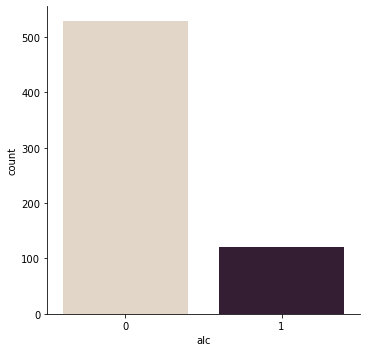

In [19]:
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))
sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)

In [20]:
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

In [21]:
df.corrwith(df['alc'])

school       -0.001771
sex          -0.321330
age           0.093562
address       0.056755
famsize      -0.056517
Pstatus       0.045782
Medu         -0.037659
Fedu          0.000740
Mjob         -0.027360
Fjob         -0.005202
reason        0.038054
guardian      0.036025
traveltime    0.083679
studytime    -0.185215
failures      0.109637
schoolsup    -0.046306
famsup       -0.086308
paid          0.063277
activities    0.045715
nursery      -0.073143
higher       -0.106124
internet      0.027428
romantic     -0.018030
famrel       -0.048541
freetime      0.110976
goout         0.310167
Dalc          0.767595
Walc          0.715466
health        0.108910
absences      0.146243
G1           -0.199509
G2           -0.192783
G3           -0.211130
week_alc      0.817516
alc           1.000000
dtype: float64

In [22]:
df.corrwith(df['week_alc'])

school       -0.031029
sex          -0.338011
age           0.118226
address       0.029962
famsize      -0.080907
Pstatus       0.065023
Medu         -0.015999
Fedu          0.024811
Mjob         -0.042662
Fjob         -0.040209
reason        0.022380
guardian      0.005471
traveltime    0.079836
studytime    -0.202412
failures      0.102211
schoolsup    -0.076384
famsup       -0.050110
paid          0.047132
activities    0.031646
nursery      -0.085211
higher       -0.115475
internet      0.058970
romantic      0.015925
famrel       -0.095450
freetime      0.128528
goout         0.364339
Dalc          0.861636
Walc          0.930831
health        0.101543
absences      0.181084
G1           -0.190931
G2           -0.194222
G3           -0.208881
week_alc      1.000000
alc           0.817516
dtype: float64

**Note:** How can you use this info during the modeling phase? Can you perform any variable significance to check this, for values only upto 18 years, or also more?

In [23]:
df[df['age'] >=19]['age'].count()

41

### df['school']

In [39]:
print("Descriptive Statistics :", '\n', df['school'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['school'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['school'].corr(df['alc']))
print("Proportion of categories :", '\n', df.school.value_counts())
print("percentage of data distrib :", '\n', df.school.value_counts(normalize=True))
df.groupby(by= 'school').mean()

Descriptive Statistics : 
 count    649.000000
mean       0.651772
std        0.476776
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: school, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.031029042549380523
Correlation with target alc consumption : 
 -0.0017714798800133127
Proportion of categories : 
 1    423
0    226
Name: school, dtype: int64
percentage of data distrib : 
 1    0.651772
0    0.348228
Name: school, dtype: float64


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
school,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.646018,16.889381,0.526549,0.690265,0.889381,2.119469,1.991150,3.119469,3.526549,2.769912,1.783186,1.827434,1.774336,0.314159,0.053097,0.570796,0.057522,0.424779,0.805310,0.836283,0.628319,0.415929,3.889381,3.230088,3.256637,1.561947,2.305310,3.420354,2.619469,10.300885,10.495575,10.650442,3.867257,0.185841
1,0.560284,16.666667,0.184397,0.711584,0.869976,2.725768,2.475177,3.309693,3.881797,2.250591,1.851064,1.430260,2.014184,0.172577,0.132388,0.635934,0.061466,0.517730,0.801418,0.924350,0.841608,0.342790,3.952719,3.153664,3.146572,1.470449,2.267139,3.598109,4.215130,11.985816,12.144208,12.576832,3.737589,0.184397


* The school the student goes to is very weakly and negatively correlated with how much alcohol the student consumes. 
* 65% of the students go to GP(1) and 35% to MS(0). Students going to MS have higher grade averages than students going to GP, but students going to MS seem to have a higher average absence than the students going to GP, also students at GP have a higher failure average than students at MS. 
* Students going to MS receive on average more extra educational support than students at GP.
* All other variables have similar averages between the two schools

Number of Students at GP(1) : 423
Number of Students at MS(0) : 226
percentage of data distrib : 
 1    0.651772
0    0.348228
Name: school, dtype: float64


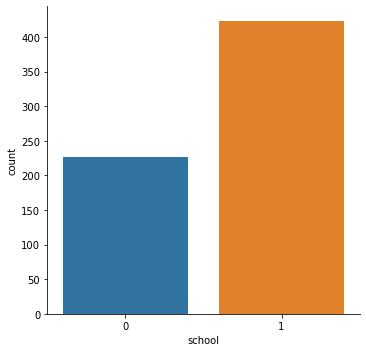

In [64]:
# student distribution in this dataset, between the two schools
sns.catplot(x="school", kind="count", data=df)
print("Number of Students at GP(1) :", df['school'].sum())
print("Number of Students at MS(0) :", df['school'].count() - df['school'].sum())
print("percentage of data distrib :", '\n', df.school.value_counts(normalize=True))

Of the students in the dataset, 65% go to GP and 35% go to MS

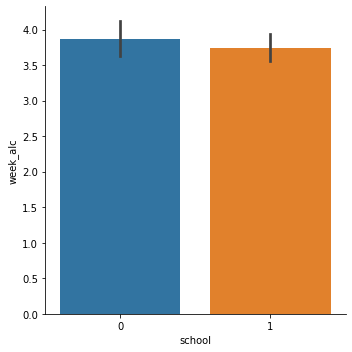

In [143]:
# distribution of alcohol consumption of students based on the school they go to
sns.catplot(x="school", y="week_alc", data=df, kind='bar', orient='v')

* Student at both the school on average consume alcohol at similar rates per week. 
* Most of the students at both schools have low or weekly alchohol consumption of less than 5.  
* Students at MS have a higher weekly alcohol consumption than students at GP, when less students in the dataset go there than at MS.

Number of Students at GP(1) : 423
Number of Students at MS(0) : 226


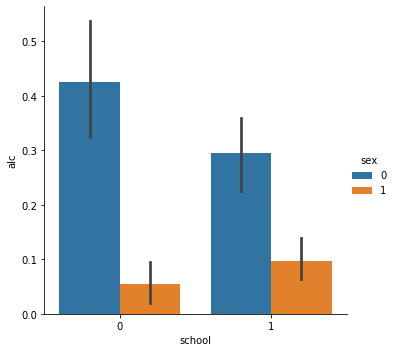

In [62]:
# distribution and relation between the sex of the student and the school they go to
sns.catplot(x="school", y="alc", hue="sex", kind="bar", data=df)


Male students at MS have a higher alcohol consumption value than male students who go to GP whereas female students at MS have a lower alcohol consumption value than those who go to GP.

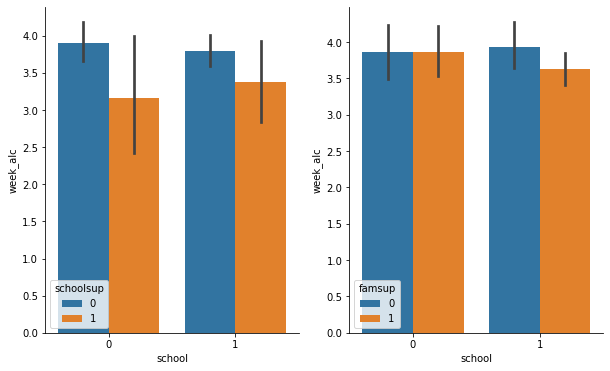

In [107]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="school", y="week_alc", hue="schoolsup", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="school", y="week_alc", hue="famsup", data=df, orient = 'v', ax = ax[1])

# df.groupby(by= 'school').count()

* In total more students at MS receive extra educational support from school

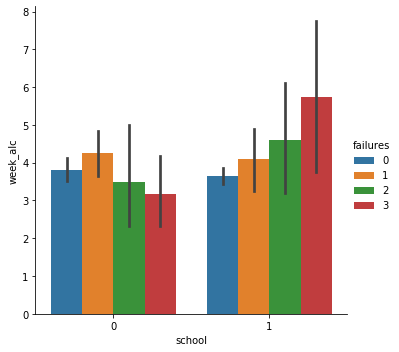

In [124]:
sns.catplot(x="school", y="week_alc", hue="failures", kind="bar", data=df)


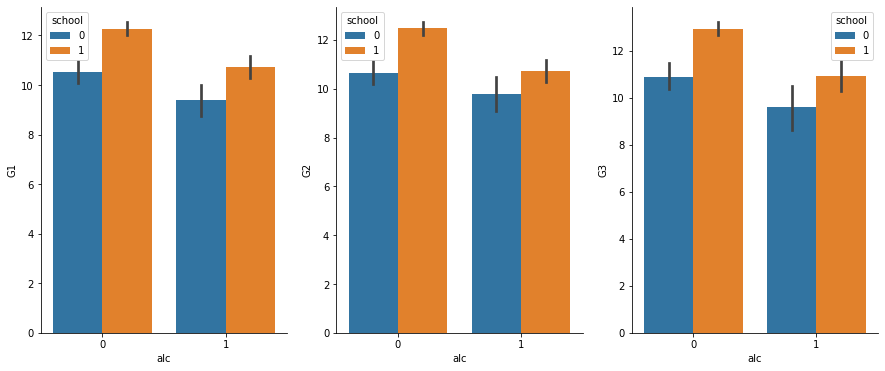

In [125]:
fig, ax = plt.subplots(1, 3, figsize= (15,6))
sns.despine(right=True)
sns.barplot(x="alc", y="G1", hue="school", data=df,  ax = ax[0])
sns.barplot(x="alc", y="G2", hue="school", data=df, ax = ax[1])
sns.barplot(x="alc", y="G3", hue="school", data=df,  ax = ax[2])


* For all students regardless of alcohol consumption, students at GP get higher grades than students at MS

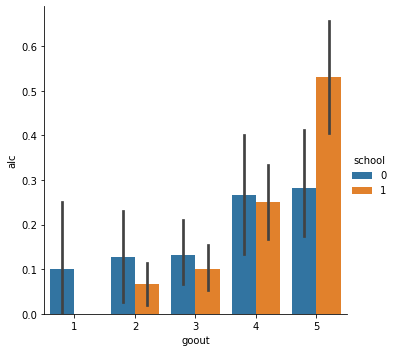

In [140]:
sns.catplot(x="goout", y="alc", hue="school", kind="bar", data=df)

* There is a strong correlation of students who go out often and how much alcohol they consume. 

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

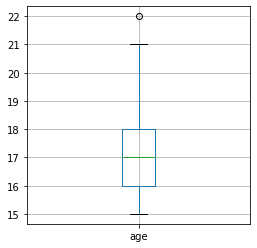

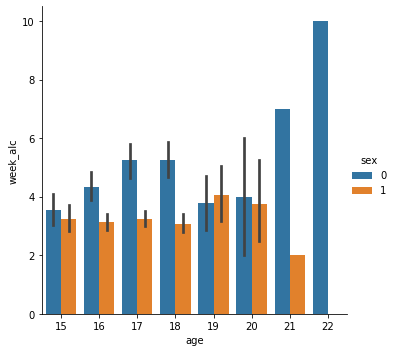

In [147]:
df.boxplot('age',figsize=(4,4))
sns.catplot(x="age", y="week_alc", hue="sex", kind="bar", data=df)
df['age'].value_counts()

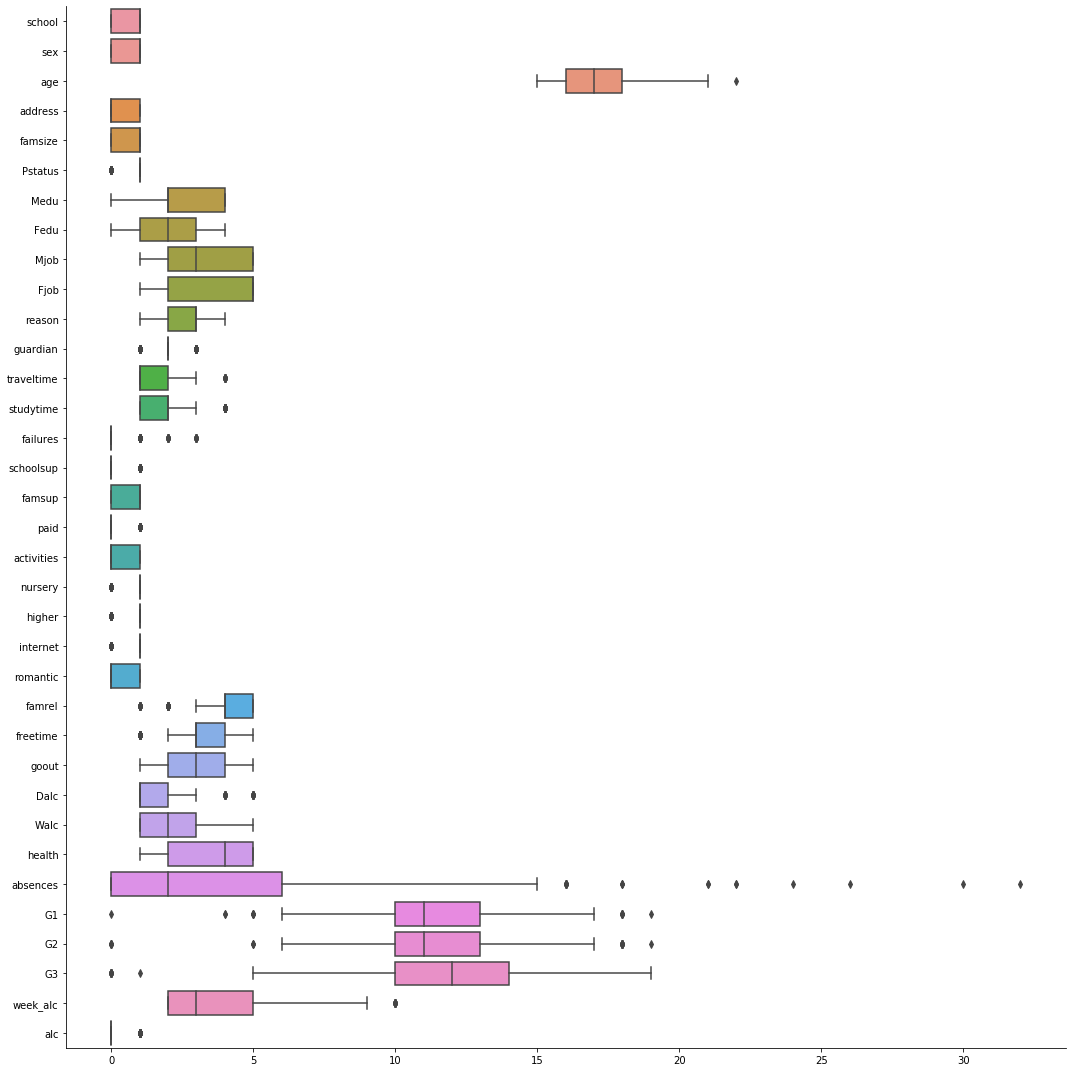

In [28]:
# plt.figure(figsize = (20,20))
sns.catplot(data=df, orient="h", kind="box", height=15)

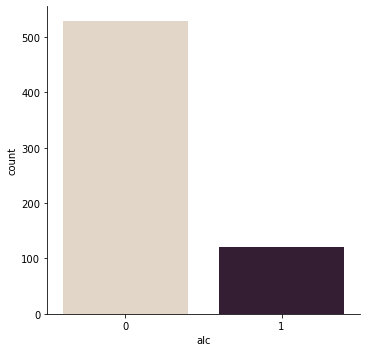

In [29]:
sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
